# Merck Challenge
## Bayesian optimization with one dimensional input

- Vanshita Gupta
- Advaith Rao

## Import packages

In [16]:
%matplotlib inline
import numpy as np
np.random.seed(237)
import matplotlib.pyplot as plt

from skopt.plots import plot_gaussian_process
from skopt import gp_minimize
from skopt.plots import plot_convergence

## Define our function to generate TRUE values for our target variable (y)

In [17]:
noise_level = 0.1

def f(x, noise_level = noise_level):
    return np.sin(5 * x[0]) * (1 - np.tanh(x[0] ** 2)) \
           + np.random.randn() * noise_level

## Plot our target variable for range of values of x -> [-2,2] with 1000 values

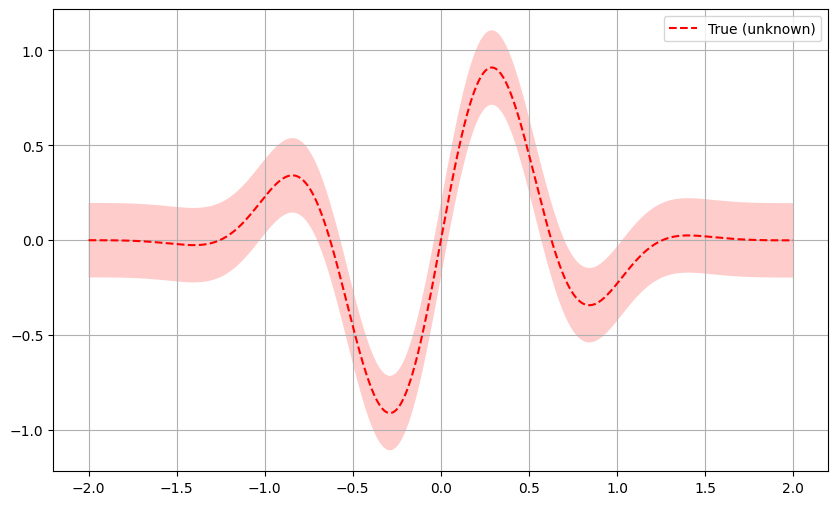

In [18]:
x = np.linspace(-2, 2, 1000).reshape(-1, 1)

fx = [f(x_i, noise_level=0.0) for x_i in x]
plt.plot(x, fx, "r--", label="True (unknown)")
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate(([fx_i - 1.9600 * noise_level for fx_i in fx],
                         [fx_i + 1.9600 * noise_level for fx_i in fx[::-1]])),
         alpha=.2, fc="r", ec="None")
plt.legend()
plt.grid()
plt.show()

Bayesian optimization based on gaussian process regression is implemented in
:class:`gp_minimize` and can be carried out as follows:



## Run Bayesian optimization with the *Gaussian Process Regressor* surrogate function and *Expected Improvement* acquision function

In [19]:
opt = gp_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  acq_func="EI",      # the acquisition function
                  n_calls=20,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.1**2,       # the noise level (optional)
                  random_state=1234)   # the random seed

## The location of minimum and value of function at minimum



In [20]:
"x^*=%.4f, f(x^*)=%.4f" % (opt.x[0], opt.fun)

'x^*=-0.3417, f(x^*)=-0.9687'

For further inspection of the results, attributes of the `res` named tuple
provide the following information:

- `x` [float]: location of the minimum.
- `fun` [float]: function value at the minimum.
- `models`: surrogate models used for each iteration.
- `x_iters` [array]:
  location of function evaluation for each iteration.
- `func_vals` [array]: function value for each iteration.
- `space` [Space]: the optimization space.
- `specs` [dict]: parameters passed to the function.



In [21]:
print(opt)

          fun: -0.9686767887547464
    func_vals: array([-0.26074652,  0.07389264,  0.55248935, -0.05449973,  0.03948457,
       -0.65372575, -0.96215782, -0.32284459, -0.07042194, -0.77998233,
       -0.87402617, -0.00481627, -0.00634346,  0.20375894,  0.06890299,
       -0.88697063, -0.86412472, -0.96842212, -0.96867679, -0.88525682])
       models: [GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=2, noise=0.010000000000000002,
                         normalize_y=True, random_state=822569775), GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=2.5) + WhiteKernel(noise_level=0.01),
                         n_restarts_optimizer=

Together these attributes can be used to visually inspect the results of the
minimization, such as the convergence trace or the acquisition function at
the last iteration:



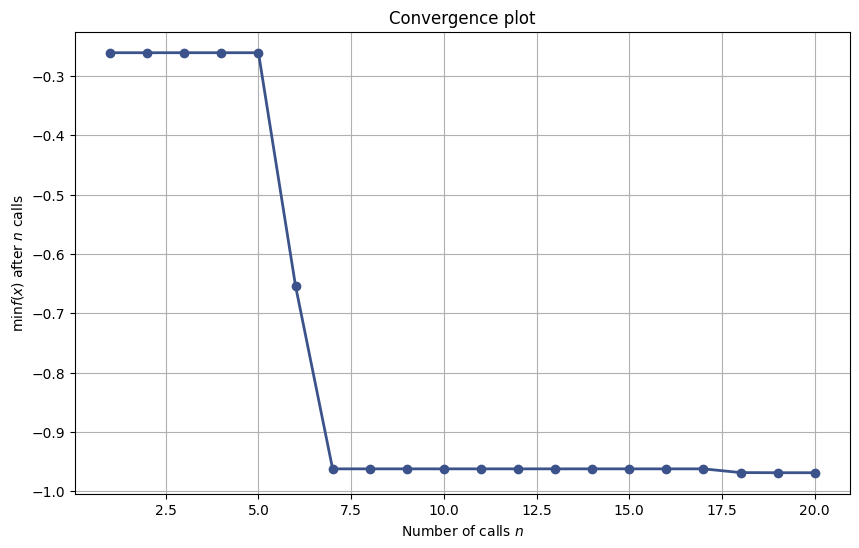

In [22]:
plot_convergence(opt);

## Let us now visually examine

1. The approximation of the fit gp model to the original function.
2. The acquisition values that determine the next point to be queried.



In [23]:
plt.rcParams["figure.figsize"] = (8, 14)


def f_wo_noise(x):
    return f(x, noise_level=0)

## Plot True Vs Predicted plots(left), as well as improvements to expected difference of residuals



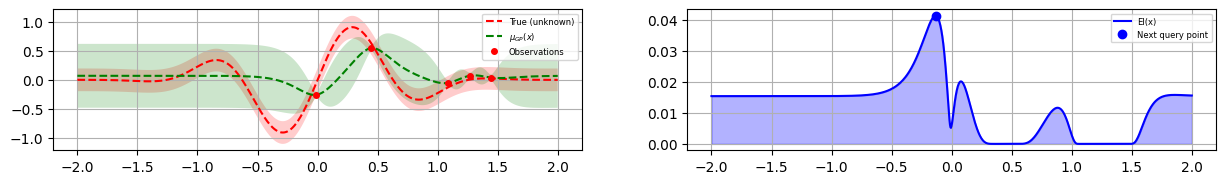

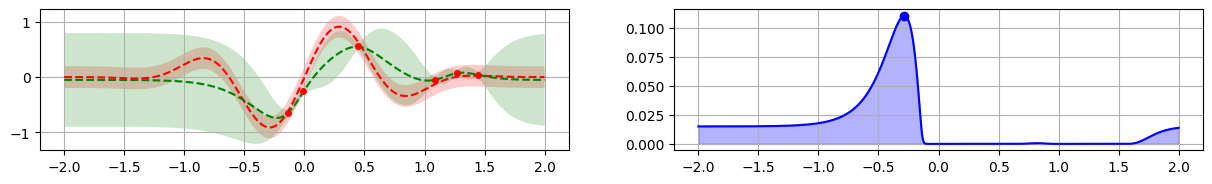

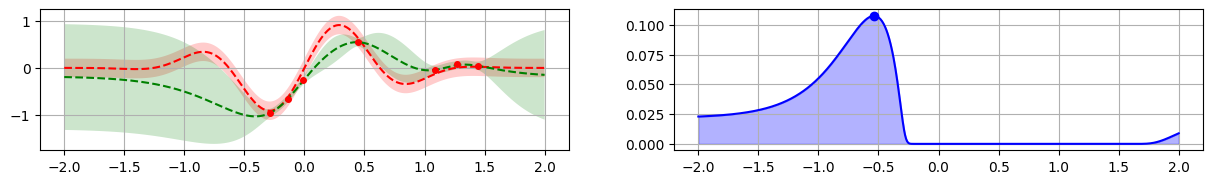

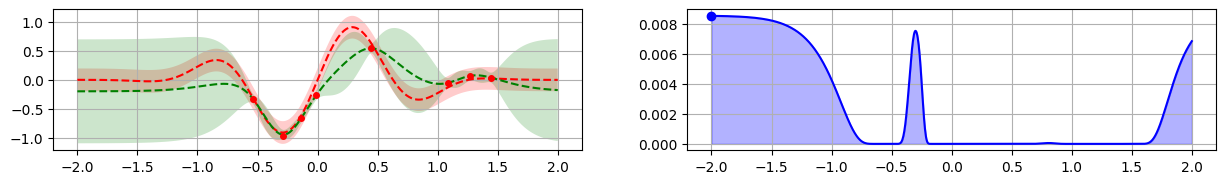

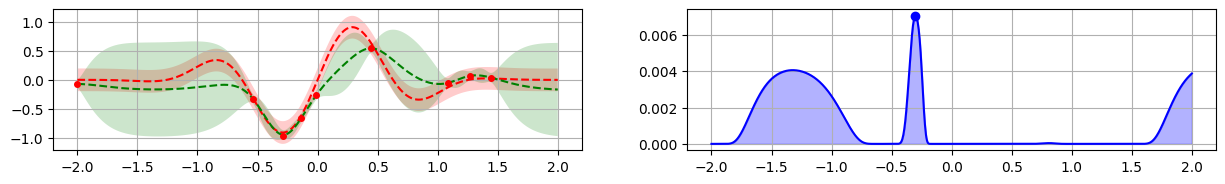

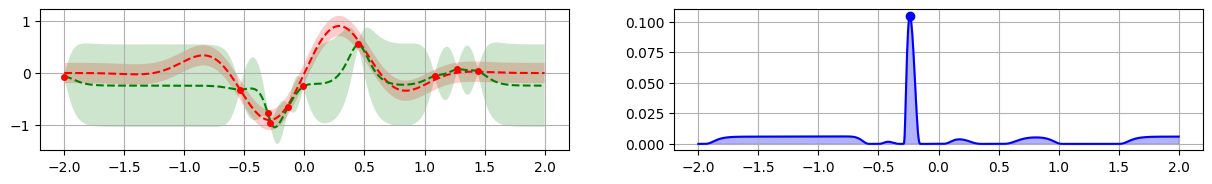

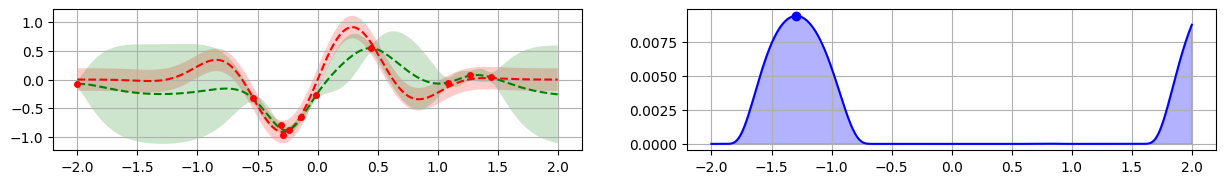

In [24]:
for n_iter in range(7):
    # Plot true function.
    plt.figure(figsize=(15,15))
    plt.subplot(7, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(opt, n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(7, 2, 2*n_iter+2)
    ax = plot_gaussian_process(opt, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")
    
plt.show()

The first column shows the following:

1. The true function.
2. The approximation to the original function by the gaussian process model
3. How sure the GP is about the function.

The second column shows the acquisition function values after every
surrogate model is fit. It is possible that we do not choose the global
minimum but a local minimum depending on the minimizer used to minimize
the acquisition function.

At the points closer to the points previously evaluated at, the variance
dips to zero.

Finally, as we increase the number of points, the GP model approaches
the actual function. The final few points are clustered around the minimum
because the GP does not gain anything more by further exploration:



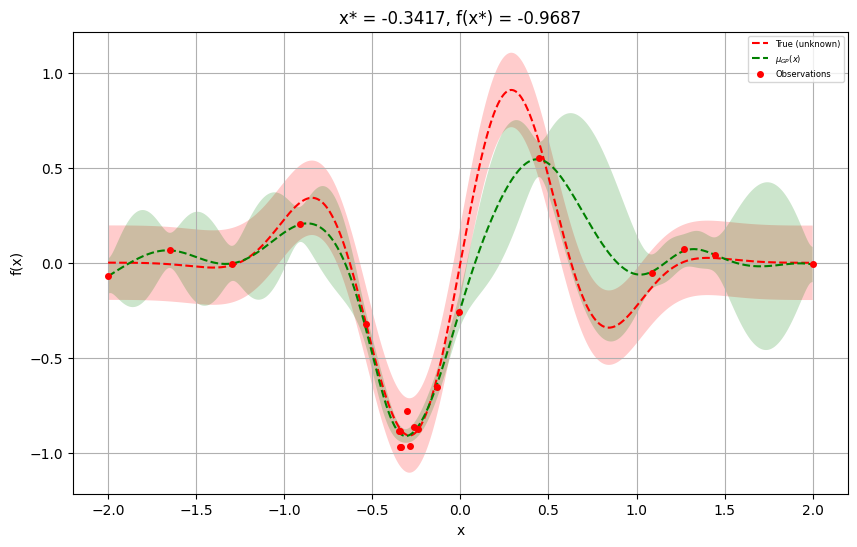

In [25]:
plt.rcParams["figure.figsize"] = (10, 6)

# Plot f(x) + contours
_ = plot_gaussian_process(opt, objective=f_wo_noise,
                          noise_level=noise_level)

plt.show()

## Try different acquision functions

Try to see how different acquision functions affect our convergence at the minima.

In [32]:
import warnings
warnings.filterwarnings("ignore")

res_gp_EI = gp_minimize(f,[(-2.0, 2.0)], n_random_starts=5,n_calls=50,acq_func='EI', random_state=1234)
res_gp_LCB = gp_minimize(f,[(-2.0, 2.0)], n_random_starts=5,n_calls=50,acq_func='LCB', random_state=1234)
res_gp_LCB_K5 = gp_minimize(f,[(-2.0, 2.0)], n_random_starts=5,n_calls=50,acq_func='LCB', random_state=1234,kappa=5)
res_gp_LCB_K10 = gp_minimize(f,[(-2.0, 2.0)], n_random_starts=5,n_calls=50,acq_func='LCB', random_state=1234,kappa=10)
res_gp_gp_hedge = gp_minimize(f,[(-2.0, 2.0)],n_random_starts=5,n_calls=50, random_state=1234)

## Make the convergence plot for all the above optimizers

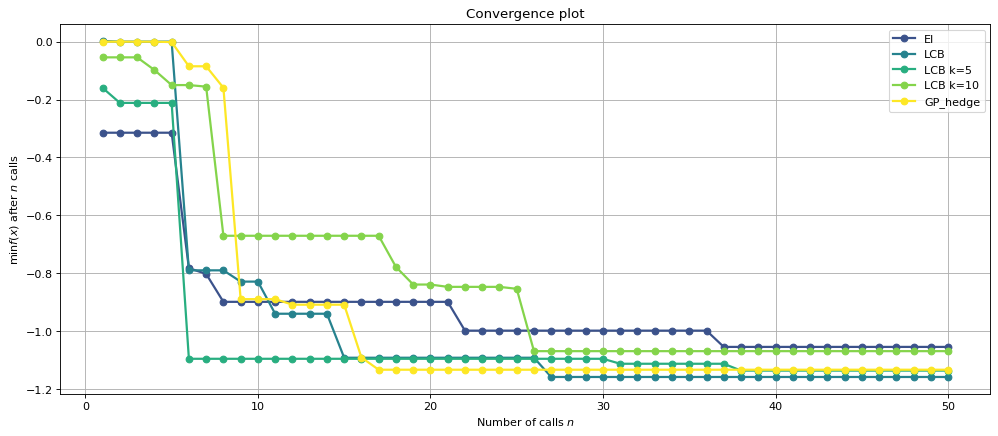

In [33]:
plt.figure(figsize=(15, 6), dpi=80)
plot = plot_convergence(("EI", res_gp_EI),
("LCB", res_gp_LCB),
("LCB k=5", res_gp_LCB_K5),
("LCB k=10", res_gp_LCB_K10),
("GP_hedge",res_gp_gp_hedge))
#, yscale="log")
plt.show()



## Try different random states for the best acquision function

Try to see how for the best acquision functions(*gp_hedge* in this case), using different random states affect our convergence at the minima.

In [28]:
res_gp_gp_hedge1 = gp_minimize(f,[(-2.0, 2.0)],acq_func="gp_hedge", n_calls=50, n_random_starts=5)
res_gp_gp_hedge =  gp_minimize(f,[(-2.0, 2.0)],acq_func="gp_hedge", n_calls=50, n_random_starts=5)
res_gp_gp_hedge2 = gp_minimize(f,[(-2.0, 2.0)],acq_func="gp_hedge", n_calls=50, n_random_starts=5)
res_gp_gp_hedge3 = gp_minimize(f,[(-2.0, 2.0)],acq_func="gp_hedge", n_calls=50, n_random_starts=5)
res_gp_gp_hedge4 = gp_minimize(f,[(-2.0, 2.0)],acq_func="gp_hedge", n_calls=50, n_random_starts=5)



## Make the convergence plot for all the above random states

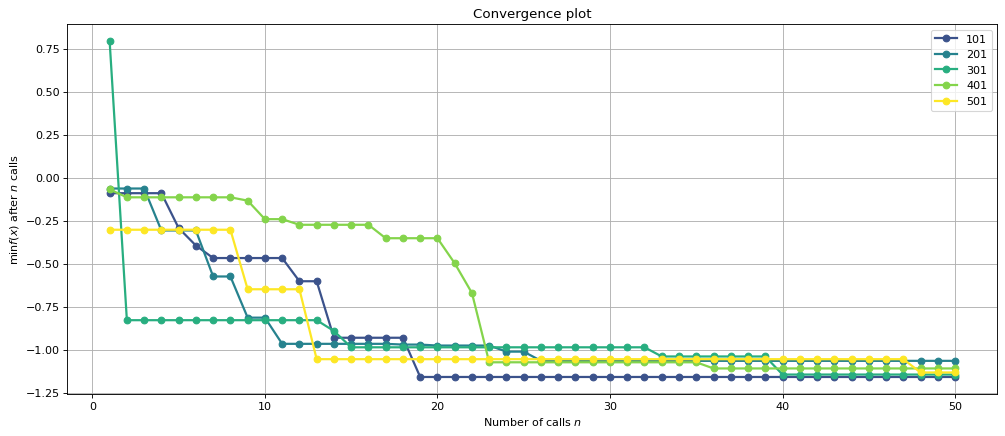

In [29]:
plt.figure(figsize=(15, 6), dpi=80)
plot = plot_convergence(("101", res_gp_gp_hedge),
("201", res_gp_gp_hedge1),
("301", res_gp_gp_hedge2),
("401", res_gp_gp_hedge3),
("501",res_gp_gp_hedge4))
#, yscale="log")
plt.show()

**After looking at the Convergence plot we can deduce acquisition function gp_hedge gives the best convergence at minima for our function**